Importando as bibliotecas

In [85]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

Importando dados do csv e dimensao dos dados


In [91]:
dados = np.loadtxt('DataAV2.csv', delimiter=',' )
X = dados[:, :-1]
Y = dados[:, -1]
N,p = X.shape

print("Amostras (X):")
print(X)

print("\nRótulos (Y):")
print(Y)

print("\n Valor de N ->", N)
print("\n Valor de p ->", p)


Amostras (X):
[[ 1.44806709  1.06475587]
 [ 2.49076465  0.1071967 ]
 [ 1.0332855   1.05197818]
 ...
 [-3.99574666 -2.34037597]
 [-1.17608807 -3.6052942 ]
 [-2.3765989  -3.7939656 ]]

Rótulos (Y):
[ 1.  1.  1. ... -1. -1. -1.]

 Valor de N -> 3360

 Valor de p -> 2


Ajustando dados para alterar as proporções da matriz

In [ ]:
#X_transposto = X.T

#linhaDeOnes = np.ones((1 , N)) 
#linhaNegativa = np.negative(linhaDeOnes) 
#X_transposto = np.concatenate(( linhaNegativa, X_transposto), axis=0)

#X = X_transposto

Embaralhamento de Dados e criação de matrizes de treino e teste

In [88]:
def dividir_dados():
    indexOfOitentaPorCento = int(N*.8)

    #Embaralhar dados
    X_embaralhado =  np.random.permutation(X)
    Y_embaralhado = np.random.permutation(Y)

    #Amostra para treino e teste 
    X_treino = X_embaralhado[:,0: indexOfOitentaPorCento] #Ir de Zero até o index 80% total (no caso é 39)
    Y_treino = Y_embaralhado[0: indexOfOitentaPorCento]
    X_teste =  X_embaralhado[:, indexOfOitentaPorCento: N] #Ir do ultimo index que representa os 80% até o fim
    Y_teste =  Y_embaralhado[indexOfOitentaPorCento: N]
    
    return X_treino, Y_treino, X_teste, Y_teste


Treino percepton

In [99]:
class PerceptronClass:

    def __init__(self, learning_rate=0.01, num_iters=1):
        self.weights = None
        self.bias = None
        self.num_iterations = num_iters
        self.lr = learning_rate

    def _unit_step_func(self, x):
        return np.where(x >= 0, 1, 0)

    def fit(self, X, y):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        y_ = np.array([1 if i > 0 else 0 for i in y])

        for _ in range(self.num_iterations):

            for idx, x_i in enumerate(X):

                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self._unit_step_func(linear_output)
                
                update = self.lr * (y_predicted - y_[idx])

                self.weights -= update * x_i
                self.bias -= update

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self._unit_step_func(linear_output)
        return y_predicted


print(X.shape)
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

perceptron = PerceptronClass()
perceptron.fit(X_train,Y_train)

y_predicted = perceptron.predict(X_test)
y_predicted_train = perceptron.predict(X_train)

acc = accuracy_score(y_predicted,Y_test)
train_acc = accuracy_score(y_predicted_train,Y_train)

print("Training Accuracy: ", train_acc)
print("Testing Accuracy: ", acc)

(3360, 2)
Training Accuracy:  0.4192708333333333
Testing Accuracy:  0.4017857142857143


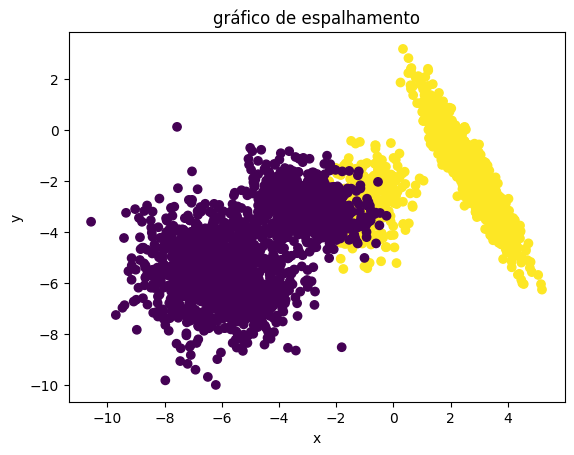

In [95]:

plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.title("gráfico de espalhamento")
plt.xlabel("x")
plt.ylabel("y")
plt.show()

In [7]:
def adaline(x, d, eta, max_epochs, epsilon):
    # Inicialize o vetor de pesos com valores nulos
    w = np.zeros(x.shape[1])

    epoch = 0  # Inicialize o contador de épocas
    while epoch < max_epochs:
        # Calcule o erro quadrático médio anterior
        EQManterior = np.mean((np.dot(x, w) - d) ** 2)

        for t in range(x.shape[0]):
            u = np.dot(w, x[t])
            w = w + eta * (d[t] - u) * x[t]

        # Incremente o contador de épocas
        epoch += 1

        # Calcule o erro quadrático médio atual
        EQMatual = np.mean((np.dot(x, w) - d) ** 2)

        # Verifique a condição de parada
        if abs(EQMatual - EQManterior) <= epsilon:
            break

    return w

# Exemplo de uso:
x = np.array([[1, 2], [2, 3], [3, 4]])
d = np.array([0, 1, 1])
eta = 0.1
max_epochs = 1000
epsilon = 0.001

weights = adaline(x, d, eta, max_epochs, epsilon)
print("Vetor de pesos treinado:", weights)


SyntaxError: incomplete input (1931503053.py, line 2)

Separando os dados treino(80%) e teste(20%)